<a href="https://colab.research.google.com/github/Selected2/Selected2/blob/main/NaturalImages_4C_proposed_resnet50_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4 Class-Classification
## Natural Image
## first model  >>  proposed_resnet50_ensemble


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
img_rows, img_cols = 224, 224 #number of rows and columns to convert the images to
input_shape = (img_rows, img_cols, 3)#format to store the images (rows, columns,channels) called channels last

In [16]:
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator1 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Train/',
        classes = ['flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator1 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Validate/',
        classes = ['flower&car','person&dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator21 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Train/',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator21 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Validate/',
        classes = ['flower','car'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

train_generator22 = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Train/',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

valid_generator22 = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Dataset/Validate/',
        classes = ['person','dog'],
        target_size=(img_rows, img_cols),batch_size=32,class_mode='binary')

Found 1532 images belonging to 2 classes.
Found 712 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.
Found 766 images belonging to 2 classes.
Found 356 images belonging to 2 classes.


In [17]:
base_model1 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model21 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)
base_model22 = tf.keras.applications.ResNet50(weights='imagenet', include_top = False)

In [18]:
for layer in base_model1.layers:   layer.trainable = False
for layer in base_model21.layers:   layer.trainable = False
for layer in base_model22.layers:   layer.trainable = False

In [19]:
x = base_model1.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

model1 = tf.keras.models.Model(inputs=base_model1.input, outputs=preds)

In [20]:
x = base_model21.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

model21 = tf.keras.models.Model(inputs=base_model21.input, outputs=preds)


In [21]:
x = base_model22.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
preds = tf.keras.layers.Dense(1, activation ='sigmoid')(x)
model22 = tf.keras.models.Model(inputs=base_model22.input, outputs=preds)

In [22]:
model1.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model21.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model22.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
cb1= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb2= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

cb3= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True
)

In [24]:
history = model1.fit(
      train_generator1,
      steps_per_epoch=train_generator1.n//train_generator1.batch_size,
      epochs=10,
      validation_data=valid_generator1,callbacks=[cb1],
      validation_steps=2)

Epoch 1/10
47/47 [==============================] - 311s 6s/step - loss: 0.1193 - accuracy: 0.9627 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 2/10
47/47 [==============================] - 279s 6s/step - loss: 2.9227e-05 - accuracy: 1.0000 - val_loss: 1.6155e-05 - val_accuracy: 1.0000
Epoch 3/10
47/47 [==============================] - 261s 6s/step - loss: 1.5853e-06 - accuracy: 1.0000 - val_loss: 3.9489e-07 - val_accuracy: 1.0000
Epoch 4/10
47/47 [==============================] - 257s 5s/step - loss: 7.6944e-07 - accuracy: 1.0000 - val_loss: 1.2687e-07 - val_accuracy: 1.0000
Epoch 5/10
47/47 [==============================] - 256s 5s/step - loss: 4.1079e-07 - accuracy: 1.0000 - val_loss: 2.3570e-09 - val_accuracy: 1.0000
Epoch 6/10
47/47 [==============================] - 254s 5s/step - loss: 2.5308e-07 - accuracy: 1.0000 - val_loss: 2.5862e-09 - val_accuracy: 1.0000
Epoch 7/10
47/47 [==============================] - 253s 5s/step - loss: 1.7221e-07 - accuracy: 1.0000 - val_loss:

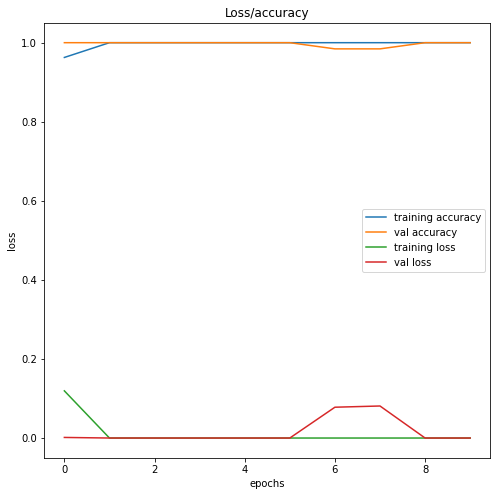

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

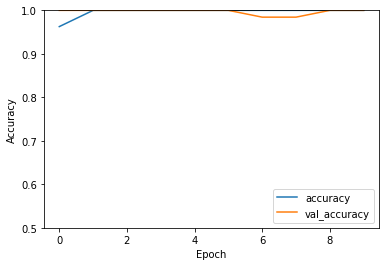

In [27]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [28]:
history = model21.fit(
      train_generator21,
      steps_per_epoch=train_generator21.n//train_generator21.batch_size,
      epochs=5,
      validation_data=valid_generator21,callbacks=[cb2],
      validation_steps=2)

Epoch 1/5
23/23 [==============================] - 138s 6s/step - loss: 5.6861e-04 - accuracy: 1.0000 - val_loss: 7.1608e-22 - val_accuracy: 1.0000
Epoch 2/5
23/23 [==============================] - 131s 6s/step - loss: 6.5970e-07 - accuracy: 1.0000 - val_loss: 5.1603e-25 - val_accuracy: 1.0000
Epoch 3/5
23/23 [==============================] - 132s 6s/step - loss: 5.9611e-09 - accuracy: 1.0000 - val_loss: 1.9122e-34 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 130s 6s/step - loss: 3.5770e-09 - accuracy: 1.0000 - val_loss: 1.9483e-17 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 129s 6s/step - loss: 3.3730e-09 - accuracy: 1.0000 - val_loss: 1.1853e-25 - val_accuracy: 1.0000


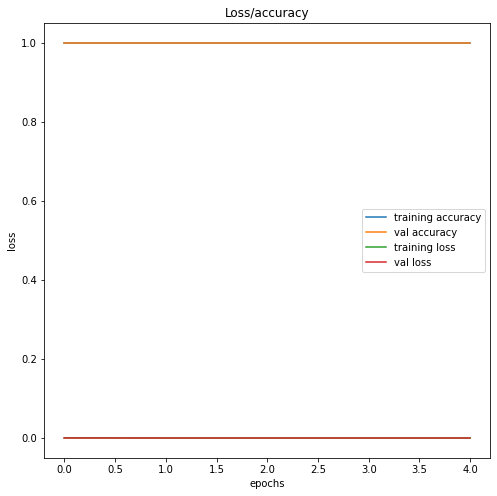

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

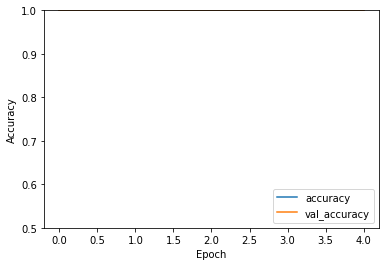

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [31]:
history = model22.fit(
      train_generator22,
      steps_per_epoch=train_generator22.n//train_generator22.batch_size,
      epochs=5,
      validation_data=valid_generator22,callbacks=[cb3],
      validation_steps=2)

Epoch 1/5
23/23 [==============================] - 200s 9s/step - loss: 0.2051 - accuracy: 0.9455 - val_loss: 9.9564e-15 - val_accuracy: 1.0000
Epoch 2/5
23/23 [==============================] - 137s 6s/step - loss: 0.0221 - accuracy: 0.9986 - val_loss: 0.0547 - val_accuracy: 0.9844
Epoch 3/5
23/23 [==============================] - 133s 6s/step - loss: 1.1876e-05 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/5
23/23 [==============================] - 134s 6s/step - loss: 9.7018e-09 - accuracy: 1.0000 - val_loss: 4.0694e-09 - val_accuracy: 1.0000
Epoch 5/5
23/23 [==============================] - 131s 6s/step - loss: 7.1393e-09 - accuracy: 1.0000 - val_loss: 5.5111e-11 - val_accuracy: 1.0000


In [32]:
model1.save('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model1/')
model21.save('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model21/')
model22.save('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model22/')

INFO:tensorflow:Assets written to: /content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model1/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model21/assets
INFO:tensorflow:Assets written to: /content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model22/assets


In [33]:
'''
model1 = tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model1/')

model21 =  tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model21/')

model22 = tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model22/')
'''

"\nmodel1 = tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model1/')\n\nmodel21 =  tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model21/')\n\nmodel22 = tf.saved_model.load('/content/drive/My Drive/db/4C/Bipartite_Adam_pln_pp/model22/')\n"

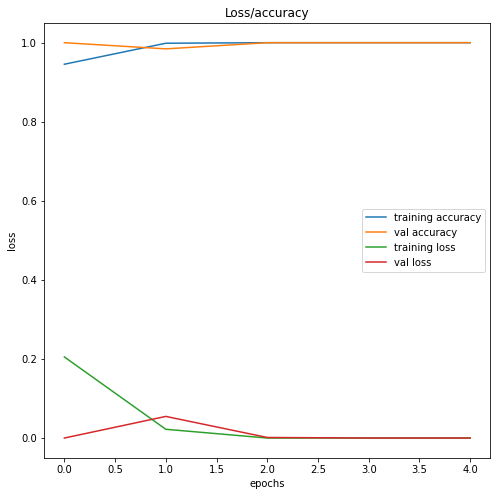

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss/accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

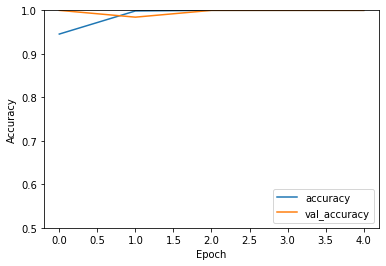

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [36]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import cv2
import os
import glob

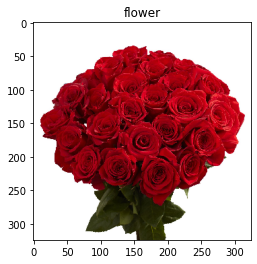

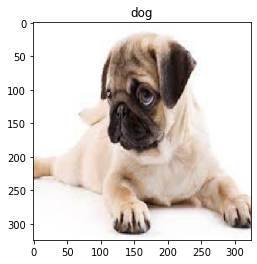

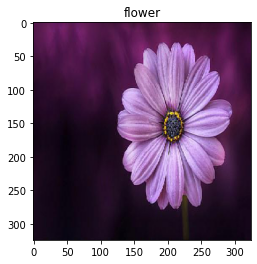

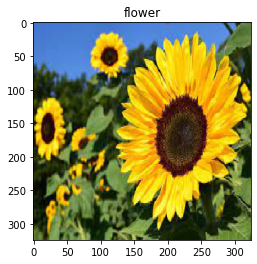

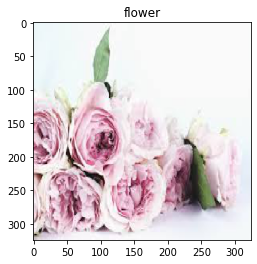

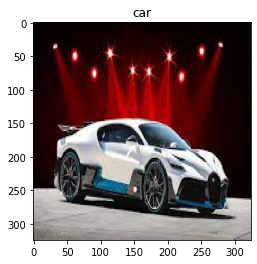

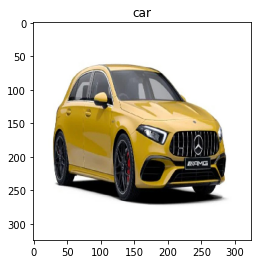

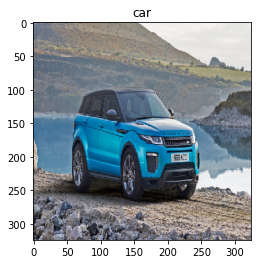

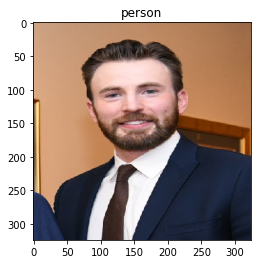

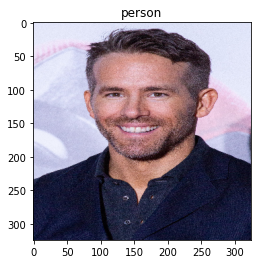

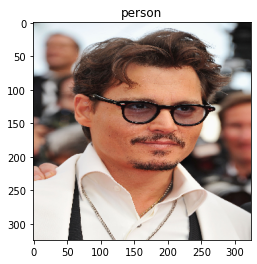

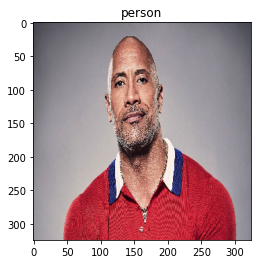

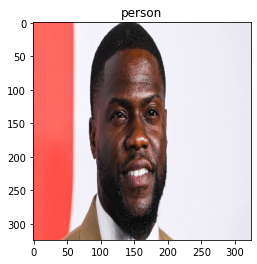

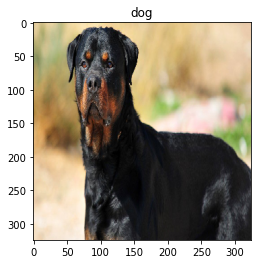

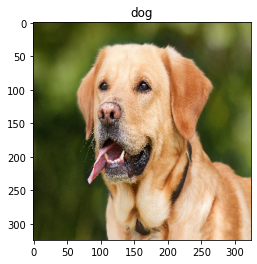

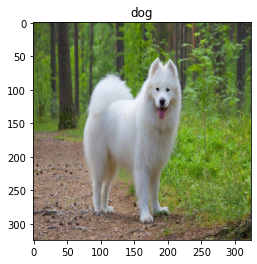

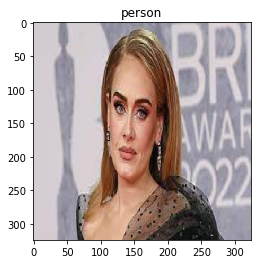

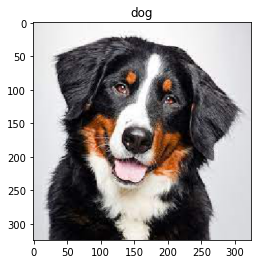

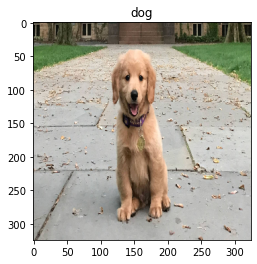

In [45]:
img_dir = '/content/drive/MyDrive/Test/'
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
ct_patas_monkey=0

for f1 in files:
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  # print(x.shape)
  # print(x)
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  classesb22 = model22.predict(images, batch_size=10)
  #print('flower:',classesb1[0][0],classesb22[0])
  if((classesb1[0] < .5) and (classesb21[0] < .5)):
        plt.imshow(img)
        plt.title('flower')
        plt.show()
  elif((classesb1[0] < .5) and (classesb21[0] > .5)):
        plt.imshow(img)
        plt.title('car')
        plt.show()
  elif((classesb1[0] > .5) and (classesb22[0] < .5)):
        plt.imshow(img)
        plt.title('person')
        plt.show()
  elif((classesb1[0] > .5) and (classesb22[0] > .5)):
        plt.imshow(img)
        plt.title('dog')
        plt.show()
  else: 
    plt.imshow(img)
    plt.title('non of them')
    plt.show()
  
  

In [46]:
ct_flower=0 
t_flower = 0
img_dir = '/content/drive/MyDrive/Dataset/Test/flower/' 
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  t_flower +=1
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesb1 = model1.predict(images, batch_size=10)
  classesb21 = model21.predict(images, batch_size=10)
  #classesb22 = model22.predict(images, batch_size=10)
  #print('airplane:',classesb1[0],classesb21[0])
  if((classesb1[0] < .5) and (classesb21[0] < .5)):    ct_flower=ct_flower+1

print(ct_flower)

166


In [47]:
print('./')
ct_car=0 
t_car=0

os.chdir('/content/')
import os

img_dir = '/content/drive/MyDrive/Dataset/Test/car/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  t_car+=1
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classess1 = model1.predict(images, batch_size=10)
  classess21 = model21.predict(images, batch_size=10)
  #classess22 = model22.predict(images, batch_size=10)
  #print('car:',classess1[0],classess21[0])
  if((classess1[0] < .5) and (classess21[0] > .5)):    ct_car=ct_car+1

print(ct_car)

./
165


In [48]:
print('./')
ct_person=0
t_person=0
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Dataset/Test/person/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  t_person+=1
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classest1 = model1.predict(images, batch_size=10)
  #classest21 = model21.predict(images, batch_size=10)
  classest22 = model22.predict(images, batch_size=10)
  #print('tracs:',classest1[0],classest22[0])
  if((classest1[0] > .5) and (classest22[0] < .5)):    ct_person=ct_person+1

print(ct_person)

./
166


In [49]:
print('./')
ct_dog=0
t_dog=0
os.chdir('/content/')
import os
img_dir = '/content/drive/MyDrive/Dataset/Test/dog/' # Enter Directory of all images.
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
data_path = os. path. join(img_dir,'*g')
files = glob. glob(data_path)
data = []
for f1 in files:
  t_dog+=1
  img = image.load_img(f1, target_size=(324, 324))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classesw1 = model1.predict(images, batch_size=10)
  #classesw21 = model21.predict(images, batch_size=10)
  classesw22 = model22.predict(images, batch_size=10)
  #print('persons:',classesw1[0],classesw22[0])
  if((classesw1[0] > .5) and (classesw22[0] > .5)):    ct_dog=ct_dog+1

print(ct_person)

./
166


In [50]:
print(ct_person,ct_dog,ct_car,ct_flower)

166 140 165 166


In [51]:
print(t_person,t_dog,t_car,t_flower)

166 142 166 166


In [52]:
print(model1.summary())

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [53]:
print(model21.summary())

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_5[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [54]:
print(model22.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_6[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [55]:
t_total = t_person+t_dog+t_car+t_flower
ct_total = ct_person+ct_flower+ct_dog+ct_car
print('Total = ',ct_total)
print('Breakup = ',ct_flower,ct_car,ct_person, ct_dog)  
print('accuracy=',ct_total/t_total)

Total =  637
Breakup =  166 165 166 140
accuracy= 0.9953125
